# # Retinopathy detection using SVM and CNN

We begin by importanting the different datasets we may need, such as pandas, sklearn, or keras. You can notice the importation of Augmentor. it's a library developped to artificillay generate new images by applying random transformation to our original dataset (https://augmentor.readthedocs.io/en/master/)

In [0]:
!pip install Augmentor

     |████████████████████████████████| 2.1MB 3.7MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 4.3.0
    Uninstalling Pillow-4.3.0:
      Successfully uninstalled Pillow-4.3.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import cv2
import glob
from keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample, shuffle
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
from keras.utils import np_utils
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import Augmentor

In [0]:
#I connect this notebook to my Google Drive to access the different pictures
import os
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
os.chdir('/content/gdrive/My Drive/fintech/fintech_DR')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


DATA PREPROCESSING :

In [0]:
with open('training_set.pkl', 'rb') as f:
        training_set = pickle.load(f)
with open('test_set.pkl', 'rb') as f:
        test_set = pickle.load(f)
training_set, val_set=train_test_split(training_set, test_size=0.05,stratify=training_set.label,random_state=42)

We notice here what will be the major challenge we will encounter : an unbalanced dataset. Here, we see that more tan 72% of our set is constitued of images of healthy people. 

In [0]:
training_set.label.value_counts()

0    832
2    174
1     91
3     27
4     16
Name: label, dtype: int64

Text(0.5, 1.0, 'Distribution of DR levels in the training set')

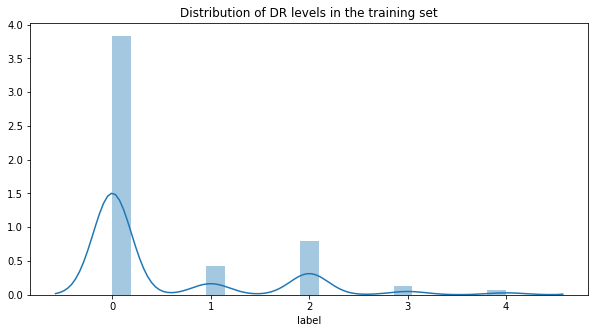

In [0]:
plt.figure(figsize = (10,5))
sns.distplot(training_set['label'])
plt.title("Distribution of DR levels in the training set")

In [0]:
labels_train_0 = training_set[training_set.label==0]
labels_train_1 = training_set[training_set.label==1]
labels_train_2 = training_set[training_set.label==2]
labels_train_3 = training_set[training_set.label==3]
labels_train_4 = training_set[training_set.label==4]

We place the images corresponding to each level disease in a new folder.

In [0]:
files=labels_train_0.filename
for file in files:
    img = load_img('images/'+file) # this is a PIL image
    img.save("images/train/label_0/"+file)
files=labels_train_1.filename
for file in files:
    img = load_img('images/'+file) # this is a PIL image
    img.save("images/train/label_1/"+file)
files=labels_train_2.filename
for file in files:
    img = load_img('images/'+file) # this is a PIL image
    img.save("images/train/label_2/"+file)
files=labels_train_3.filename
for file in files:
    img = load_img('images/'+file) # this is a PIL image
    img.save("images/train/label_3/"+file)
files=labels_train_4.filename
for file in files:
    img = load_img('images/'+file) # this is a PIL image
    img.save("images/train/label_4/"+file)

OSError: ignored

In [0]:
p = Augmentor.Pipeline("images/train/label_1/",output_directory="output") 
p.flip_left_right(0.5) 
p.greyscale(0.1) 
p.rotate180(0.3) 
p.skew(0.4, 0.5) 
p.zoom(probability = 0.2, min_factor = 0.9, max_factor = 1.1) 
p.process()
p.sample(741) 

In [0]:
p = Augmentor.Pipeline("images/train/label_2/",output_directory="output") 
p.flip_left_right(0.5) 
p.greyscale(0.1) 
p.rotate180(0.3) 
p.skew(0.4, 0.5) 
p.zoom(probability = 0.2, min_factor = 0.9, max_factor = 1.1) 
p.process()
p.sample(658) 

In [0]:
p = Augmentor.Pipeline("images/train/label_3",output_directory="output") 
p.flip_left_right(0.5) 
p.greyscale(0.1) 
p.rotate180(0.3) 
p.skew(0.4, 0.5) 
p.zoom(probability = 0.2, min_factor = 0.9, max_factor = 1.1) 
p.process()
p.sample(805) 

In [0]:
p = Augmentor.Pipeline("images/train/label_4",output_directory="output") 
p.flip_left_right(0.5) 
p.greyscale(0.1) 
p.rotate180(0.3) 
p.skew(0.4, 0.5) 
p.zoom(probability = 0.2, min_factor = 0.9, max_factor = 1.1) 
p.process()
p.sample(816) 

In [0]:
files=test_set.filename
for file in files:
    img = load_img('images/'+file) # this is a PIL image
    img.save("images/test/"+file)

In [0]:
files=val_set.filename
for file in files:
    img = load_img('images/'+file) # this is a PIL image
    img.save("images/val/"+file)

In [0]:
labels_val_0 = val_set[val_set.label==0]
labels_val_1 = val_set[val_set.label==1]
labels_val_2 = val_set[val_set.label==2]
labels_val_3 = val_set[val_set.label==3]
labels_val_4 = val_set[val_set.label==4]
val_set.label.value_counts()

0    44
2     9
1     5
4     1
3     1
Name: label, dtype: int64

In [0]:
files=labels_val_0.filename
for file in files:
    img = load_img('images/'+file) # this is a PIL image
    img.save("images/val/label_0/"+file)
files=labels_val_1.filename
for file in files:
    img = load_img('images/'+file) # this is a PIL image
    img.save("images/val/label_1/"+file)
files=labels_val_2.filename
for file in files:
    img = load_img('images/'+file) # this is a PIL image
    img.save("images/val/label_2/"+file)
files=labels_val_3.filename
for file in files:
    img = load_img('images/'+file) # this is a PIL image
    img.save("images/val/label_3/"+file)
files=labels_val_4.filename
for file in files:
    img = load_img('images/'+file) # this is a PIL image
    img.save("images/val/label_4/"+file)

In [0]:
#I first augmented the validation set also, but it increased the processing time of the CNN
"""
p = Augmentor.Pipeline("images/val/label_1/",output_directory="output") 
p.flip_left_right(0.5) 
p.greyscale(0.1) 
p.rotate180(0.3) 
p.skew(0.4, 0.5) 
p.zoom(probability = 0.2, min_factor = 0.9, max_factor = 1.1) 
p.process()
p.sample(39) 

p = Augmentor.Pipeline("images/val/label_2/",output_directory="output") 
p.flip_left_right(0.5) 
p.greyscale(0.1) 
p.rotate180(0.3) 
p.skew(0.4, 0.5) 
p.zoom(probability = 0.2, min_factor = 0.9, max_factor = 1.1) 
p.process()
p.sample(35) 

p = Augmentor.Pipeline("images/val/label_3/",output_directory="output") 
p.flip_left_right(0.5) 
p.greyscale(0.1) 
p.rotate180(0.3) 
p.skew(0.4, 0.5) 
p.zoom(probability = 0.2, min_factor = 0.9, max_factor = 1.1) 
p.process()
p.sample(43) 

p = Augmentor.Pipeline("images/val/label_4/",output_directory="output") 
p.flip_left_right(0.5) 
p.greyscale(0.1) 
p.rotate180(0.3) 
p.skew(0.4, 0.5) 
p.zoom(probability = 0.2, min_factor = 0.9, max_factor = 1.1) 
p.process()
p.sample(43) 
"""

In [0]:
#creation of a numpy array gathering all the images of the augmented training set
train=[]
train_labels=[]
for myFile in glob.glob("images/train/label_0/*.jpeg"):
    image = cv2.imread (myFile)
    image = cv2.resize(image,(300,300))
    train.append(image)
    train_labels.append(0)
for myFile in glob.glob("images/train/label_1/output/*.jpeg"):
    image = cv2.imread (myFile)
    image = cv2.resize(image,(300,300))
    train.append(image)
    train_labels.append(1)
for myFile in glob.glob("images/train/label_2/output/*.jpeg"):
    image = cv2.imread (myFile)
    image = cv2.resize(image,(300,300))
    train.append(image)
    train_labels.append(2)
for myFile in glob.glob("images/train/label_3/output/*.jpeg"):
    image = cv2.imread (myFile)
    image = cv2.resize(image,(300,300))
    train.append(image)
    train_labels.append(3)
for myFile in glob.glob("images/train/label_4/output/*.jpeg"):
    image = cv2.imread (myFile)
    image = cv2.resize(image,(300,300))
    train.append(image)
    train_labels.append(4)

In [0]:
len(train)

4160

In [0]:
#we also create a numpy array with the images of the testing set, and their corresponding labels
test_labels = []
test=[]
files_0 = test_set[test_set.label==0].filename
files_1 = test_set[test_set.label==1].filename
files_2 = test_set[test_set.label==2].filename
files_3 = test_set[test_set.label==3].filename
files_4 = test_set[test_set.label==4].filename
for myFile in files_0:
    image = cv2.imread ("images/test/"+myFile)
    image = cv2.resize(image,(300,300))
    test.append(image)
    test_labels.append(0)
for myFile in files_1:
    image = cv2.imread ("images/test/"+myFile)
    image = cv2.resize(image,(300,300))
    test.append(image)
    test_labels.append(1)
for myFile in files_2:
    image = cv2.imread ("images/test/"+myFile)
    image = cv2.resize(image,(300,300))
    test.append(image)
    test_labels.append(2)
for myFile in files_3:
    image = cv2.imread ("images/test/"+myFile)
    image = cv2.resize(image,(300,300))
    test.append(image)
    test_labels.append(3)
for myFile in files_4:
    image = cv2.imread ("images/test/"+myFile)
    image = cv2.resize(image,(300,300))
    test.append(image)
    test_labels.append(4)

In [0]:
#same for the validation set
val_labels = []
val=[]
for myFile in glob.glob("images/val/label_0/*.jpeg"):
    image = cv2.imread (myFile)
    image = cv2.resize(image,(300,300))
    val.append(image)
    val_labels.append(0)
for myFile in glob.glob("images/val/label_1/*.jpeg"):
    image = cv2.imread (myFile)
    image = cv2.resize(image,(300,300))
    val.append(image)
    val_labels.append(1)
for myFile in glob.glob("images/val/label_2/*.jpeg"):
    image = cv2.imread (myFile)
    image = cv2.resize(image,(300,300))
    val.append(image)
    val_labels.append(2)
for myFile in glob.glob("images/val/label_3/*.jpeg"):
    image = cv2.imread (myFile)
    image = cv2.resize(image,(300,300))
    val.append(image)
    val_labels.append(3)
for myFile in glob.glob("images/val/label_4/*.jpeg"):
    image = cv2.imread (myFile)
    image = cv2.resize(image,(300,300))
    val.append(image)
    val_labels.append(4)

## MODEL TRAINING :
Now we fit a convolutional neural network model on the images.

In [0]:
num = 5
epochs = 10
bs = 32

In [0]:
# transform the label into categorical values
val_labels=np_utils.to_categorical(val_labels,num)
train_labels=np_utils.to_categorical(train_labels,num)
val=np.array(val)
train=np.array(train)

In [0]:
import tensorflow as tf

def kappa_loss(y_pred, y_true, y_pow=2, eps=1e-10, N=5, bsize=256, name='kappa'):
    """A continuous differentiable approximation of discrete kappa loss.
        Args:
            y_pred: 2D tensor or array, [batch_size, num_classes]
            y_true: 2D tensor or array,[batch_size, num_classes]
            y_pow: int,  e.g. y_pow=2
            N: typically num_classes of the model
            bsize: batch_size of the training or validation ops
            eps: a float, prevents divide by zero
            name: Optional scope/name for op_scope.
        Returns:
            A tensor with the kappa loss."""

    with tf.name_scope(name):
        y_true = tf.to_float(y_true)
        repeat_op = tf.to_float(tf.tile(tf.reshape(tf.range(0, N), [N, 1]), [1, N]))
        repeat_op_sq = tf.square((repeat_op - tf.transpose(repeat_op)))
        weights = repeat_op_sq / tf.to_float((N - 1) ** 2)
    
        pred_ = y_pred ** y_pow
        try:
            pred_norm = pred_ / (eps + tf.reshape(tf.reduce_sum(pred_, 1), [-1, 1]))
        except Exception:
            pred_norm = pred_ / (eps + tf.reshape(tf.reduce_sum(pred_, 1), [bsize, 1]))
            
        hist_rater_a = tf.reduce_sum(pred_norm, 0)
        hist_rater_b = tf.reduce_sum(y_true, 0)
    
        conf_mat = tf.matmul(tf.transpose(pred_norm), y_true)
    
        nom = tf.reduce_sum(weights * conf_mat)
        denom = tf.reduce_sum(weights * tf.matmul(
            tf.reshape(hist_rater_a, [N, 1]), tf.reshape(hist_rater_b, [1, N])) /
                              tf.to_float(bsize))
    
        return nom / (denom + eps)

In [0]:
#CNN
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape = (300,300,3)))
model.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(output_dim= num, activation='softmax'))
model.compile(optimizer=adam(lr=0.0001),loss=kappa_loss, metrics=["accuracy"])

    













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use `tf.cast` instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=5)`


In [0]:
H = model.fit(train,train_labels,batch_size=bs,
                        validation_data=(val,val_labels),
                        epochs=epochs)



Train on 4160 samples, validate on 60 samples
Epoch 1/10
4160/4160 [==============================] - 4408s 1s/step - loss: 5.8921 - acc: 0.2702 - val_loss: 7.7701 - val_acc: 0.5667
Epoch 2/10
 128/4160 [..............................] - ETA: 1:11:03 - loss: 6.7484 - acc: 0.2188

RESULTS :

In [0]:
model.save_weights('images/first_model_last.h5')
test=np.array(test)
y_pred=model.predict_classes(test)

In [0]:
#confusion matrix

print(confusion_matrix(test_labels,y_pred))

In [0]:
#classification report

print(classification_report(test_labels,y_pred))